# Import Python Libraries


In [1]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotnine

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import euclidean
from DBCV import DBCV
from sklearn.feature_selection import VarianceThreshold
from itertools import compress
from sklearn import preprocessing
from sklearn.cluster import KMeans
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from kmodes.kmodes import KModes

import seaborn as sns
import hdbscan
import sklearn.metrics as metrics
import pandas as pd

# Load data


In [2]:
df = pd.read_excel('all.xlsx')
df = df.iloc[1:] #remove first row
df = df.iloc[: , 1:] # remove time column
print("Data size:", df.shape) # print data size
df.columns = ['{}'.format(i) for i in range(len(df.columns))] # column names
df.head()

Data size: (13661, 51)


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
1,0,578.62,1017.01,6.96,386.75,0,2.85,0,1007.95,0,...,1,1,1,1,1,1,1,1,1,1
2,0,578.55,1017.01,6.96,386.51,0,1.57,0,1008.24,0,...,1,1,1,1,1,1,1,1,1,1
3,0,577.87,1017.01,6.96,386.77,0,9.87,2.07,997.83,0,...,2,1,1,1,1,1,1,1,1,2
4,0,578.65,1017.01,6.95,386.77,0,17.94,2.05,983.35,0,...,2,1,1,1,1,1,1,1,1,2
5,0,578.98,1017.01,6.96,386.64,0,17.8,2.06,967.78,0,...,2,1,1,1,2,1,1,1,1,2


Check duplicates 

In [3]:
df.duplicated().sum() # check the duplicates

0

Remove features with only one value 

In [4]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
print("Data size:", df.shape) # print data size
df.columns = ['{}'.format(i) for i in range(len(df.columns))] # column names
df.head()


Data size: (13661, 39)


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
1,0,578.62,1017.01,6.96,386.75,0,2.85,0,1007.95,65.16,...,1,1,1,1,1,1,1,1,1,1
2,0,578.55,1017.01,6.96,386.51,0,1.57,0,1008.24,65.27,...,1,1,1,1,0,1,1,1,1,1
3,0,577.87,1017.01,6.96,386.77,0,9.87,2.07,997.83,62.75,...,1,1,0,1,2,2,2,1,1,2
4,0,578.65,1017.01,6.95,386.77,0,17.94,2.05,983.35,61.68,...,1,1,2,1,1,2,2,1,1,2
5,0,578.98,1017.01,6.96,386.64,0,17.8,2.06,967.78,60.5,...,1,1,2,1,1,2,2,2,1,2


# Data types


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13661 entries, 1 to 13661
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13661 non-null  object
 1   1       13661 non-null  object
 2   2       13661 non-null  object
 3   3       13661 non-null  object
 4   4       13661 non-null  object
 5   5       13661 non-null  object
 6   6       13661 non-null  object
 7   7       13661 non-null  object
 8   8       13661 non-null  object
 9   9       13661 non-null  object
 10  10      13661 non-null  object
 11  11      13661 non-null  object
 12  12      13661 non-null  object
 13  13      13661 non-null  object
 14  14      13661 non-null  object
 15  15      13661 non-null  object
 16  16      13661 non-null  object
 17  17      13661 non-null  object
 18  18      13661 non-null  object
 19  19      13661 non-null  object
 20  20      13661 non-null  object
 21  21      13661 non-null  object
 22  22      13661 non-null

In [6]:
df = df.astype(float) #set data type as float for all features

# Descriptive Statistics

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,...,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000
mean,1.556448,691.446398,250.063051,7.756857,344.859821,1.544751,14.043350,1.554724,828.256294,172.067969,...,1.646219,1.019252,1.806310,1.039236,1.029134,1.755289,1.911500,1.910987,1.011053,1.911500
std,2.129987,109.415001,258.247646,0.805545,54.279119,1.131187,6.947472,0.864677,209.862795,53.737832,...,0.478160,0.168086,0.413489,0.226529,0.212770,0.429932,0.284031,0.284772,0.104556,0.284031
min,0.000000,490.730000,137.100000,6.150000,242.350000,0.000000,0.010000,0.000000,242.850000,52.010000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,590.150000,154.960000,7.100000,281.310000,0.000000,9.530000,2.030000,817.780000,121.740000,...,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,704.170000,165.220000,7.430000,369.670000,2.370000,17.940000,2.040000,875.780000,179.950000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,4.490000,814.460000,174.510000,8.780000,387.590000,2.380000,18.290000,2.050000,954.830000,216.250000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
max,4.670000,824.760000,1017.340000,9.000000,456.800000,2.440000,19.060000,2.150000,1013.160000,251.950000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Missing valus

In [8]:
df.isnull().sum()/len(df)*100

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
dtype: float64

# Feature Selection

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.heatmap(corr, annot = True)
#plt.savefig('figuree.eps')
#plt.show()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,1.00,-0.34,-0.25,0.02,-0.05,0.33,0.14,0.14,0.27,0.09,0.23,0.25,0.11,0.10,0.17,-0.03,0.23,0.23,0.23,0.23,0.22,0.14,0.23,0.03,0.94,0.32,0.17,0.18,0.25,0.32,-0.05,-0.01,-0.02,0.01,0.13,0.23,0.23,0.02,0.23
1,-0.34,1.00,0.38,-0.11,0.13,-0.61,-0.37,-0.35,-0.33,-0.12,-0.35,-0.33,-0.22,-0.13,-0.31,0.06,-0.35,-0.35,-0.35,-0.35,-0.33,-0.19,-0.35,0.02,-0.34,-0.61,-0.40,-0.25,-0.49,-0.62,0.09,-0.17,0.09,0.04,-0.35,-0.35,-0.35,0.03,-0.35
2,-0.25,0.38,1.00,-0.25,0.23,-0.46,-0.58,-0.56,-0.89,-0.41,-0.91,-0.82,-0.51,-0.44,-0.65,0.14,-0.91,-0.91,-0.91,-0.91,-0.88,-0.52,-0.91,-0.03,-0.23,-0.46,0.18,-0.27,-0.37,-0.46,0.21,0.00,0.16,0.00,-0.54,-0.91,-0.91,0.00,-0.91
3,0.02,-0.11,-0.25,1.00,-0.99,0.06,0.13,0.11,0.25,0.06,0.20,0.26,0.62,-0.00,0.02,-0.27,0.20,0.20,0.21,0.22,0.23,-0.23,0.22,-0.00,0.02,0.06,-0.10,0.11,0.30,0.06,-0.05,-0.02,-0.05,-0.01,0.11,0.21,0.21,-0.01,0.21
4,-0.05,0.13,0.23,-0.99,1.00,-0.10,-0.12,-0.10,-0.23,-0.04,-0.18,-0.24,-0.65,0.03,0.01,0.29,-0.18,-0.17,-0.19,-0.20,-0.20,0.25,-0.20,0.00,-0.04,-0.10,0.04,-0.15,-0.32,-0.10,0.04,0.02,0.04,0.01,-0.10,-0.19,-0.19,0.01,-0.19
5,0.33,-0.61,-0.46,0.06,-0.10,1.00,0.39,0.40,0.31,0.16,0.42,0.40,0.20,0.18,0.31,-0.06,0.42,0.42,0.42,0.41,0.40,0.26,0.42,0.07,0.32,0.99,0.76,0.57,0.80,1.00,-0.07,0.14,-0.01,0.02,0.38,0.42,0.42,0.05,0.42
6,0.14,-0.37,-0.58,0.13,-0.12,0.39,1.00,0.98,0.45,0.25,0.58,0.49,0.31,0.27,0.42,-0.07,0.58,0.58,0.58,0.58,0.55,0.34,0.59,-0.21,0.13,0.40,0.03,0.17,0.32,0.39,-0.23,0.71,-0.33,-0.16,0.97,0.58,0.58,-0.21,0.58
7,0.14,-0.35,-0.56,0.11,-0.10,0.40,0.98,1.00,0.42,0.21,0.55,0.46,0.27,0.24,0.41,-0.05,0.55,0.55,0.55,0.55,0.52,0.34,0.56,-0.19,0.13,0.40,0.06,0.17,0.32,0.40,-0.21,0.68,-0.30,-0.08,0.98,0.55,0.55,-0.19,0.55
8,0.27,-0.33,-0.89,0.25,-0.23,0.31,0.45,0.42,1.00,0.43,0.86,0.86,0.51,0.45,0.64,-0.14,0.86,0.85,0.86,0.85,0.82,0.48,0.86,0.01,0.24,0.31,-0.28,0.12,0.26,0.31,-0.21,-0.11,-0.17,0.00,0.42,0.86,0.85,-0.02,0.86
9,0.09,-0.12,-0.41,0.06,-0.04,0.16,0.25,0.21,0.43,1.00,0.40,0.48,0.18,0.98,0.11,-0.15,0.40,0.40,0.39,0.38,0.44,0.18,0.39,0.02,0.08,0.16,-0.11,0.22,0.12,0.16,-0.11,-0.01,-0.09,-0.00,0.21,0.40,0.40,-0.00,0.40


In [10]:
def remove_collinear_features(x, threshold):
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print("Feature ",col.values[0], " and ", "Feature ",row.values[0], "=", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [11]:
df=remove_collinear_features(df, 0.8) #will remove all features with correlation greater or qual to the 0.85

Feature  4  and  Feature  3 = 0.99
Feature  7  and  Feature  6 = 0.98
Feature  8  and  Feature  2 = 0.89
Feature  10  and  Feature  2 = 0.91
Feature  10  and  Feature  8 = 0.86
Feature  11  and  Feature  2 = 0.82
Feature  11  and  Feature  8 = 0.86
Feature  11  and  Feature  10 = 0.86
Feature  13  and  Feature  9 = 0.98
Feature  16  and  Feature  2 = 0.91
Feature  16  and  Feature  8 = 0.86
Feature  16  and  Feature  10 = 1.0
Feature  16  and  Feature  11 = 0.86
Feature  17  and  Feature  2 = 0.91
Feature  17  and  Feature  8 = 0.85
Feature  17  and  Feature  10 = 1.0
Feature  17  and  Feature  11 = 0.85
Feature  17  and  Feature  16 = 1.0
Feature  18  and  Feature  2 = 0.91
Feature  18  and  Feature  8 = 0.86
Feature  18  and  Feature  10 = 1.0
Feature  18  and  Feature  11 = 0.85
Feature  18  and  Feature  16 = 1.0
Feature  18  and  Feature  17 = 1.0
Feature  19  and  Feature  2 = 0.91
Feature  19  and  Feature  8 = 0.85
Feature  19  and  Feature  10 = 1.0
Feature  19  and  Feature  

In [12]:
df.shape

(13661, 20)

In [13]:
df.head(10)

,0,1,2,3,5,6,9,12,14,15,21,23,26,27,28,30,31,32,33,37
1,0.0,578.62,1017.01,6.96,0.0,2.85,65.16,7.12,239.20,33.30,0.00,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,578.55,1017.01,6.96,0.0,1.57,65.27,7.12,239.20,33.30,0.00,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,0.0,577.87,1017.01,6.96,0.0,9.87,62.75,7.12,237.86,351.16,0.00,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0
4,0.0,578.65,1017.01,6.95,0.0,17.94,61.68,7.12,238.66,186.03,0.00,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
5,0.0,578.98,1017.01,6.96,0.0,17.80,60.50,7.12,237.86,81.21,1.17,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
6,0.0,578.31,1017.01,6.95,0.0,17.79,59.96,7.12,237.86,37.83,4.16,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
7,0.0,579.04,1017.01,6.96,0.0,17.80,58.47,7.12,241.09,23.11,4.13,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
8,0.0,578.91,1017.01,6.94,0.0,17.77,57.71,7.14,246.04,21.34,4.05,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
9,0.0,579.05,1017.01,6.94,0.0,17.86,56.83,7.14,250.06,21.48,4.10,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
10,0.0,578.32,1017.01,6.97,0.0,17.85,55.93,7.15,252.54,22.98,4.10,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


Feature selection using Variance Threshold :

In [14]:
#Return a list of selected variables based on the threshold.
def fs_variance(df, threshold:float=0.1):
    
    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select

In [15]:
selected_columns=fs_variance(df)
selected_columns

['0', '1', '2', '3', '5', '6', '9', '14', '15', '21', '26', '27', '28', '31']

Features selection using Mean Absolute Difference

In [16]:
mean_abs_diff=np.sum(np.abs( df - np.mean(df, axis=0)), axis = 0)/df.shape[0] #calculate MAD

In [17]:
mean_abs_diff

0       2.025240
1      97.597414
2     156.191321
3       0.728373
5       1.078455
6       6.018100
9      46.790584
12      0.229426
14      6.915568
15      2.187112
21      0.594103
23      0.033581
26      0.381978
27      0.468974
28      0.496776
30      0.046952
31      0.315212
32      0.088474
33      0.073058
37      0.021862
dtype: float64

<BarContainer object of 20 artists>

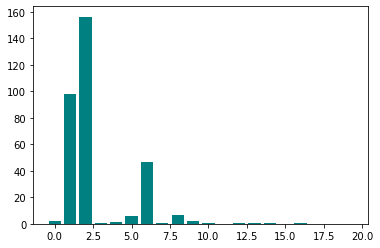

In [18]:
plt.bar(np.arange(df.shape[1]),mean_abs_diff , color ='teal') #plot the barchat
#plt.savefig('dataSelection.eps',format='eps')

In [19]:
df.shape

(13661, 20)

In [20]:
df=df[selected_columns]
df.head()

,0,1,2,3,5,6,9,14,15,21,26,27,28,31
1,0.0,578.62,1017.01,6.96,0.0,2.85,65.16,239.20,33.30,0.00,1.0,1.0,1.0,1.0
2,0.0,578.55,1017.01,6.96,0.0,1.57,65.27,239.20,33.30,0.00,1.0,1.0,1.0,1.0
3,0.0,577.87,1017.01,6.96,0.0,9.87,62.75,237.86,351.16,0.00,1.0,1.0,1.0,0.0
4,0.0,578.65,1017.01,6.95,0.0,17.94,61.68,238.66,186.03,0.00,1.0,1.0,1.0,2.0
5,0.0,578.98,1017.01,6.96,0.0,17.80,60.50,237.86,81.21,1.17,1.0,1.0,1.0,2.0


# Categorical features

In [21]:
cat_features = ["26","27","28","31"]

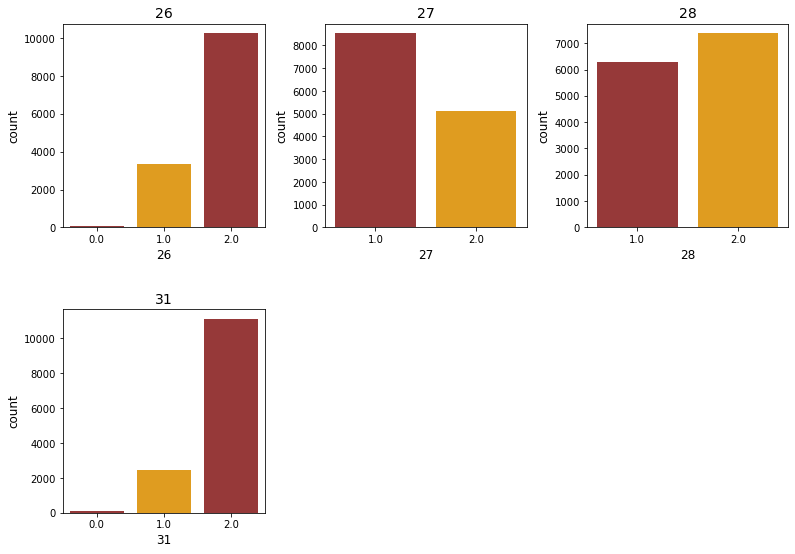

In [22]:
plt.figure(figsize=(13, 9))
for i, var in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, palette = ['brown', "orange"])

# Numerical features 

In [23]:
num_features = ["0","1","2","3","5","6","9","14","15","21"]

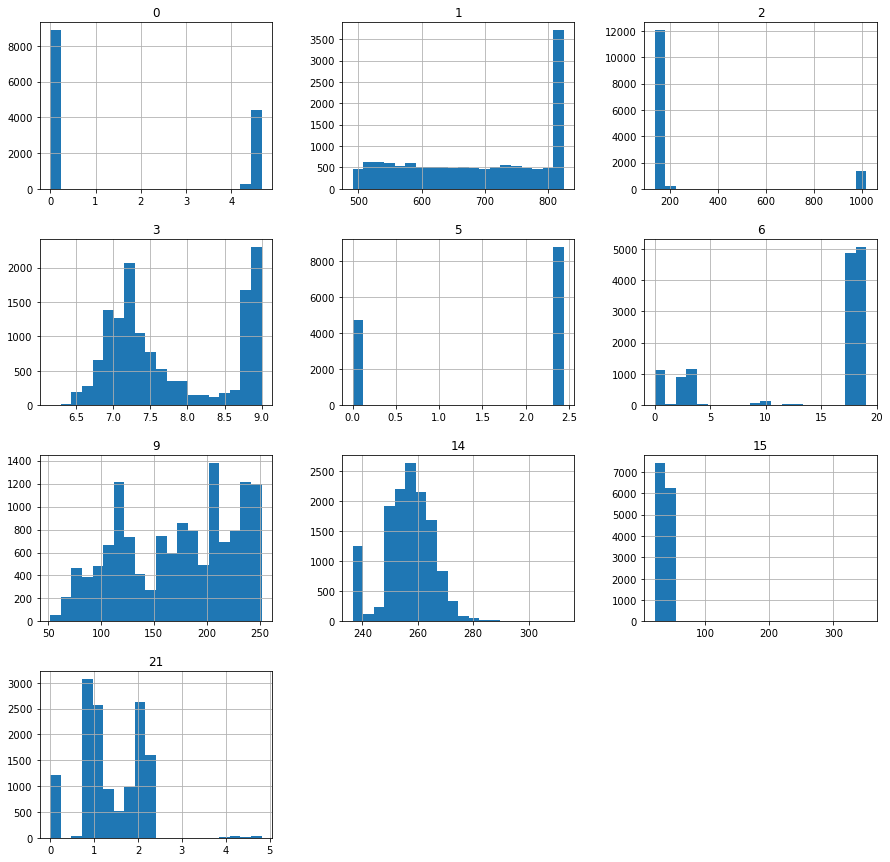

In [24]:
df[num_features].hist(bins=20,figsize=(15, 15))
plt.show()

# One-Hot Encoding to Categorical features


In [25]:
one_hot_encoded_data = pd.get_dummies(df,columns=cat_features)
one_hot_encoded_data.head()

,0,1,2,3,5,6,9,14,15,21,26_0.0,26_1.0,26_2.0,27_1.0,27_2.0,28_1.0,28_2.0,31_0.0,31_1.0,31_2.0
1,0.0,578.62,1017.01,6.96,0.0,2.85,65.16,239.20,33.30,0.00,0,1,0,1,0,1,0,0,1,0
2,0.0,578.55,1017.01,6.96,0.0,1.57,65.27,239.20,33.30,0.00,0,1,0,1,0,1,0,0,1,0
3,0.0,577.87,1017.01,6.96,0.0,9.87,62.75,237.86,351.16,0.00,0,1,0,1,0,1,0,1,0,0
4,0.0,578.65,1017.01,6.95,0.0,17.94,61.68,238.66,186.03,0.00,0,1,0,1,0,1,0,0,0,1
5,0.0,578.98,1017.01,6.96,0.0,17.80,60.50,237.86,81.21,1.17,0,1,0,1,0,1,0,0,0,1


# Data normalization

In [26]:
x = one_hot_encoded_data.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.263120,0.999625,0.284211,0.0,0.149081,0.065770,0.036533,0.036262,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.262911,0.999625,0.284211,0.0,0.081890,0.066320,0.036533,0.036262,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.260875,0.999625,0.284211,0.0,0.517585,0.053716,0.018987,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.263210,0.999625,0.280702,0.0,0.941207,0.048365,0.029462,0.499333,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.264198,0.999625,0.284211,0.0,0.933858,0.042463,0.018987,0.181523,0.242739,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Kmeans Clustering Algorithm

Elbow Method 

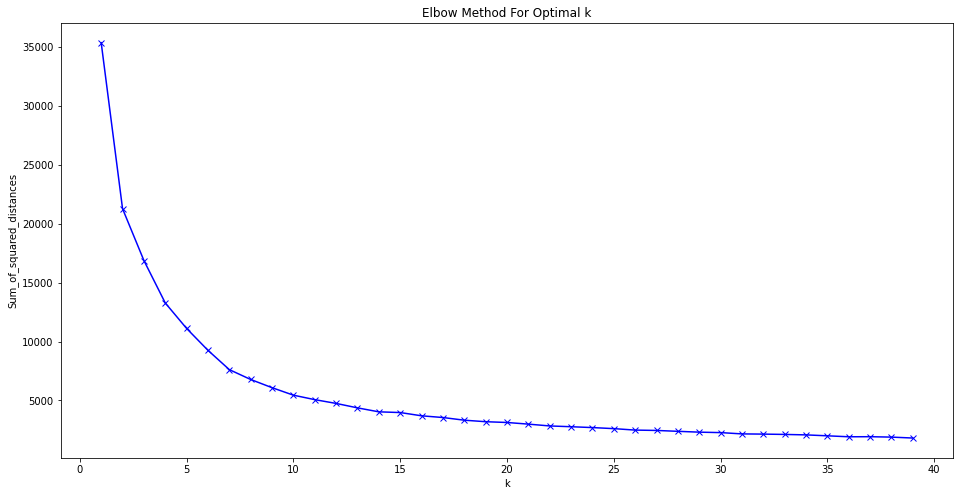

In [101]:
#determine the optimal number of clusters for k-means clustering
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0).fit(df)

In [30]:
#create a new columns cluster and assign each row to it's predicted cluster
y_predicted=kmeans.fit_predict(df);
df['kmeans_cluster'] = y_predicted
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,kmeans_cluster
0,0.0,0.263120,0.999625,0.284211,0.0,0.149081,0.065770,0.036533,0.036262,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2
1,0.0,0.262911,0.999625,0.284211,0.0,0.081890,0.066320,0.036533,0.036262,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2
2,0.0,0.260875,0.999625,0.284211,0.0,0.517585,0.053716,0.018987,1.000000,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2
3,0.0,0.263210,0.999625,0.280702,0.0,0.941207,0.048365,0.029462,0.499333,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4
4,0.0,0.264198,0.999625,0.284211,0.0,0.933858,0.042463,0.018987,0.181523,0.242739,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


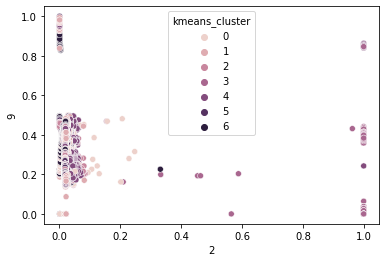

In [31]:
sns.scatterplot(data=df, x=2, y=9, hue=df['kmeans_cluster'])
plt.savefig('kmeansclusters.eps',format='eps')
plt.show()


In [32]:
silhouette_coefficient = metrics.silhouette_score(df, kmeans.labels_, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)

silhouette coefficient : 0.6041100571278606


In [33]:
#remove the new created column so it doesn't effect the other modules
df.drop('kmeans_cluster', inplace=True, axis=1)

# KModes Clustering Algorithm

In [105]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()
dfMatrix

# Choosing optimal K
cost = []
for cluster in range(1, 15):
    try:
        kmodes = KModes( n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
       

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14


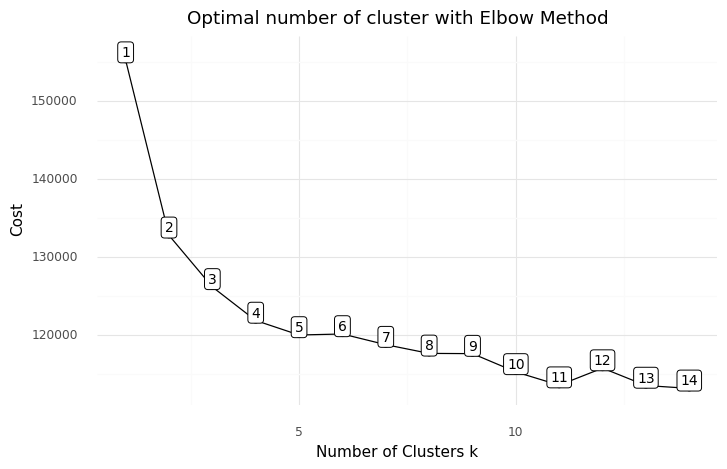

<ggplot: (101468795871)>

In [106]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 15), 'Cost': cost})

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)
       

In [34]:
# Fit the cluster
kmodes = KModes( n_clusters = 7, init = 'Huang', random_state = 0)
kmodes.fit_predict(df)

array([0, 0, 0, ..., 5, 4, 4], dtype=uint16)

In [35]:
#create a new columns cluster and assign each row to it's predicted cluster
y_predicted=kmodes.fit_predict(df);
df['kmodes_cluster'] = y_predicted
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,kmodes_cluster
0,0.0,0.263120,0.999625,0.284211,0.0,0.149081,0.065770,0.036533,0.036262,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.0,0.262911,0.999625,0.284211,0.0,0.081890,0.066320,0.036533,0.036262,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,0.0,0.260875,0.999625,0.284211,0.0,0.517585,0.053716,0.018987,1.000000,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,0.0,0.263210,0.999625,0.280702,0.0,0.941207,0.048365,0.029462,0.499333,0.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,0.0,0.264198,0.999625,0.284211,0.0,0.933858,0.042463,0.018987,0.181523,0.242739,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


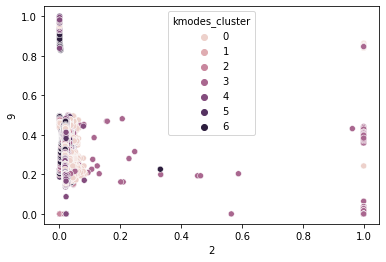

In [36]:
sns.scatterplot(data=df, x=2, y=9, hue=df['kmodes_cluster'])
#plt.savefig('kmodeclusters.eps',format='eps')
plt.show()


In [37]:
silhouette_coefficient = metrics.silhouette_score(df, kmodes.labels_, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)

silhouette coefficient : 0.3545133776104477


In [38]:
#remove the new created column so it doesn't effect the other modules
df.drop('kmodes_cluster', inplace=True, axis=1)

# DBSCAN Clustering Algorithm

Cross validation

Finding the Optimal value of Epsilon

In [119]:
#hyper parameter tuning.Selecting best eps
range_eps = np.arange(0.01, 1.00, 0.03) 

for ep in range_eps:
    dbscan_c = DBSCAN(eps=ep,min_samples=20).fit(df)
    core_sample_mask = np.zeros_like(dbscan_c.labels_,dtype=bool)
    core_sample_mask[dbscan_c.core_sample_indices_] = True
    labels=dbscan_c.labels_
    silhouette_avg = silhouette_score(df,labels)
    print("for eps value ="+str(ep)+"the total number of clusters are "+str(len(set(labels)))+"the average silhouette_score is : ",silhouette_avg)


for eps value =0.01the total number of clusters are 7the average silhouette_score is :  0.13492814310188167
for eps value =0.04the total number of clusters are 14the average silhouette_score is :  0.05904978859190718
for eps value =0.06999999999999999the total number of clusters are 45the average silhouette_score is :  -0.29500741840821315
for eps value =0.09999999999999999the total number of clusters are 52the average silhouette_score is :  -0.1991458089566195
for eps value =0.13the total number of clusters are 67the average silhouette_score is :  -0.1006061888633312
for eps value =0.16the total number of clusters are 51the average silhouette_score is :  0.031084295931646737
for eps value =0.19the total number of clusters are 46the average silhouette_score is :  0.21193867799830507
for eps value =0.22the total number of clusters are 38the average silhouette_score is :  0.35767127817153155
for eps value =0.25the total number of clusters are 32the average silhouette_score is :  0.424682

Finding the Optimal value of min_samples

In [81]:
#hyper parameter tuning.Selecting best min sampes
range_min_samples = np.arange(1, 70, 3) 

for min_s in range_min_samples:
    dbscan_c = DBSCAN(eps=0.61,min_samples=min_s).fit(df)
    core_sample_mask = np.zeros_like(dbscan_c.labels_,dtype=bool)
    core_sample_mask[dbscan_c.core_sample_indices_] = True
    labels=dbscan_c.labels_
    silhouette_avg = silhouette_score(df,labels)
    print("for min_samples value ="+str(min_s),"the total number of clusters are ",str(len(set(labels)))," the average silhouette_score is : ",silhouette_avg)


for min_samples value =1 the total number of clusters are  65  the average silhouette_score is :  0.48884426546649473
for min_samples value =4 the total number of clusters are  38  the average silhouette_score is :  0.5108735017997403
for min_samples value =7 the total number of clusters are  34  the average silhouette_score is :  0.5154144806144617
for min_samples value =10 the total number of clusters are  32  the average silhouette_score is :  0.5167946846579722
for min_samples value =13 the total number of clusters are  29  the average silhouette_score is :  0.5235386385102379
for min_samples value =16 the total number of clusters are  27  the average silhouette_score is :  0.5213519429160673
for min_samples value =19 the total number of clusters are  27  the average silhouette_score is :  0.5213519429160673
for min_samples value =22 the total number of clusters are  26  the average silhouette_score is :  0.5199341802861455
for min_samples value =25 the total number of clusters are

Applying DBSCAN with Optimal value of Epsilon = 0.61 and min_samples=31

In [29]:
dbscan_cluster = DBSCAN(eps=0.61,min_samples=31)
dbscan_cluster.fit(df)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating silhouette
silhouette_coefficient = metrics.silhouette_score(df, labels, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)


Estimated no. of clusters: 16
Estimated no. of noise points: 221
silhouette coefficient : 0.5085871946456582


Apply DBCV to the half of our dataset 

In [31]:
x = df[:5000]
labels=dbscan_cluster.fit_predict(x)

hdbscan_score = DBCV(x.values, labels, dist_function=euclidean)
print(hdbscan_score)

0.37151053394106515


# Hdbscan Clustering Algorithm


In [84]:
#hyper parameter tuning.Selecting best eps
range_eps = [0.25,0.30,0.40,0.45,0.5,0.55,0.58,0.60,0.62,0.64,0.68,0.7,0.73,0.77,0.79,0.8]
for min_s in range_eps:
    hbscan_c = hdbscan.HDBSCAN(cluster_selection_epsilon=min_s, min_samples = 30)
    labels=hbscan_c.fit_predict(df)
    silhouette_avg = silhouette_score(df,labels)

    print("for cluster_selection_epsilon value ="+str(min_s),"the total number of clusters are ",str(len(set(labels)))," the average silhouette_score is : ",silhouette_avg)

for cluster_selection_epsilon value =0.25 the total number of clusters are  39  the average silhouette_score is :  0.4764973444367384
for cluster_selection_epsilon value =0.3 the total number of clusters are  37  the average silhouette_score is :  0.48904347787601343
for cluster_selection_epsilon value =0.4 the total number of clusters are  32  the average silhouette_score is :  0.5014465490581489
for cluster_selection_epsilon value =0.45 the total number of clusters are  31  the average silhouette_score is :  0.4983525065376701
for cluster_selection_epsilon value =0.5 the total number of clusters are  29  the average silhouette_score is :  0.5045447367521056
for cluster_selection_epsilon value =0.55 the total number of clusters are  29  the average silhouette_score is :  0.5045447367521056
for cluster_selection_epsilon value =0.58 the total number of clusters are  28  the average silhouette_score is :  0.5048472977758146
for cluster_selection_epsilon value =0.6 the total number of clu

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16], dtype=int64)

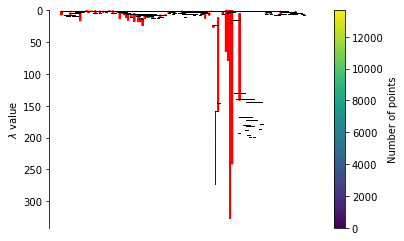

In [39]:
hdbscan = hdbscan.HDBSCAN(cluster_selection_epsilon=0.68, min_samples = 30)
labels = hdbscan.fit_predict(df)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

In [40]:
# Number of Clusters
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(labels).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating silhouette
silhouette_coefficient = metrics.silhouette_score(df, labels, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)


Estimated no. of clusters: 17
Estimated no. of noise points: 107
silhouette coefficient : 0.5247795784725179


Apply DBCV to the half of our dataset 

In [41]:
x = df[:5000]
labels = hdbscan.fit_predict(x)

hdbscan_score = DBCV(x.values, labels, dist_function=euclidean)
print(hdbscan_score)

0.38514725889632473


# Isolation tree Clustering Algorithm

In [61]:
model = IsolationForest(random_state=42)

param_grid ={'n_estimators': list(range(5, 30, 5)), 
              'max_samples': list(range(5, 30, 5)), 
              'contamination': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features': [5,10,15], 
              'bootstrap': [True, False], 
              'n_jobs': [5, 10, 20, 30]}

grid_search = model_selection.GridSearchCV(model, 
                                           param_grid,
                                           scoring="neg_mean_squared_error", 
                                           refit=True,
                                           cv=5, 
                                           return_train_score=True)


best_model = grid_search.fit(df)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'bootstrap': True, 'contamination': 0.1, 'max_features': 5, 'max_samples': 5, 'n_estimators': 5, 'n_jobs': 5}


In [34]:
random_state = np.random.RandomState(42)

model=IsolationForest(n_estimators=6,max_samples=5,max_features=5,contamination=0.1,bootstrap=True,random_state=random_state)

model.fit(df)

print(model.get_params())

{'bootstrap': True, 'contamination': 0.1, 'max_features': 5, 'max_samples': 5, 'n_estimators': 6, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x2B38F963940, 'verbose': 0, 'warm_start': False}


In [35]:
df['scores'] = model.decision_function(df)

df['anomaly_score'] = model.predict(df)

df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,scores,anomaly_score
0,0.0,0.263120,0.999625,0.284211,0.0,0.149081,0.065770,0.036533,0.036262,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.030981,-1
1,0.0,0.262911,0.999625,0.284211,0.0,0.081890,0.066320,0.036533,0.036262,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.030981,-1
2,0.0,0.260875,0.999625,0.284211,0.0,0.517585,0.053716,0.018987,1.000000,0.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.030981,-1
3,0.0,0.263210,0.999625,0.280702,0.0,0.941207,0.048365,0.029462,0.499333,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.029480,1
4,0.0,0.264198,0.999625,0.284211,0.0,0.933858,0.042463,0.018987,0.181523,0.242739,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.029480,1
5,0.0,0.262192,0.999625,0.280702,0.0,0.933333,0.039762,0.018987,0.049997,0.863071,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.029480,1
6,0.0,0.264377,0.999625,0.284211,0.0,0.933858,0.032310,0.061281,0.005367,0.856846,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.057533,1
7,0.0,0.263988,0.999625,0.277193,0.0,0.932283,0.028509,0.126097,0.000000,0.840249,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.057533,1
8,0.0,0.264407,0.999625,0.277193,0.0,0.937008,0.024107,0.178735,0.000424,0.850622,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.057533,1
9,0.0,0.262222,0.999625,0.287719,0.0,0.936483,0.019606,0.211209,0.004972,0.850622,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.057533,1


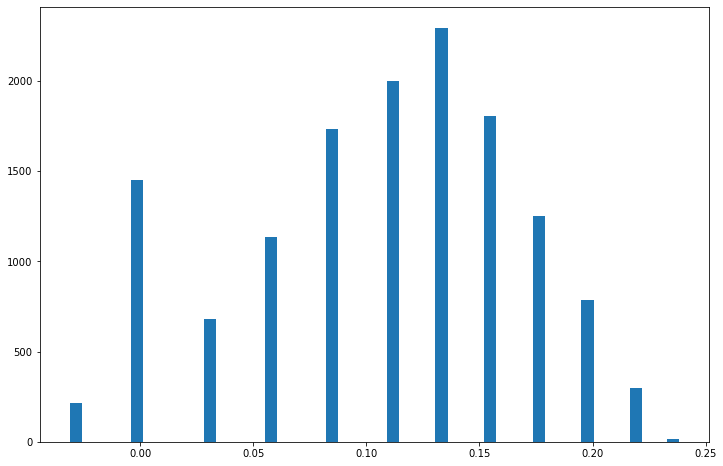

In [36]:
#### Ploting the graph to identify the anomolie score .
plt.figure(figsize=(12, 8))
plt.hist(df['scores'], bins=50);
plt.savefig('anomoliesscores.eps',format='eps')

In [132]:
fpr,tpr,thresholds_sorted=metrics.roc_curve(df['anomaly_score'],df['scores'])
print("The Area Under the Curve (AUC) -> ",metrics.auc(fpr, tpr))


The Area Under the Curve (AUC) ->  1.0


In [37]:
anomalies = (df.anomaly_score.values == -1).sum()
print("Total number of anomalies :",anomalies)

Total number of anomalies : 214


In [38]:
#remove the new created column so it doesn't effect the other modules
df.drop('scores', inplace=True, axis=1)
df.drop('anomaly_score', inplace=True, axis=1)